In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('apples_and_oranges.csv')
data['Class'] = data['Class'].str.capitalize()
data.head()

,Weight,Size,Class
0,69,4.39,Orange
1,69,4.21,Orange
2,65,4.09,Orange
3,72,5.85,Apple
4,67,4.7,Orange


In [6]:
sns.scatterplot(x ='Size',y='Weight',hue='Class',data='data', palette = {'Apple': 'red', 'Orange': 'orange'})
plt.title('Visualization of Size and Weight (by Fruit)')
plt.xlabel('Size (Centimeters)')
plt.ylabel('Weight (Grams)')
plt.legend(title = 'Fruit')
plt.show()

TypeError: Data source must be a DataFrame or Mapping, not <class 'str'>.

In [7]:
n = data['Size'].values
weights = data['Weight'].values
labelll = data['Class']

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labelll)

In [8]:
features = np.column_stack((n, weights))
model = SVC(kernel = 'rbf', gamma = 'auto')
model.fit(features,labels_encoded)

ValueError: could not convert string to float: 'Size'

In [9]:
size_min, size_max = n.min() - 1, n.max() + 1
weight_min, weight_max = weights.min() - 1, weights.max() + 1
n, weights = np.meshgrid(np.arange(size_min, size_max, 0.1),
                     np.arange(weight_min, weight_max, 0.1))

TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [ ]:
predictions = model.predict(np.c_[sizes.ravel(), weights.ravel()])
predictions = predictions.reshape(sizes.shape)

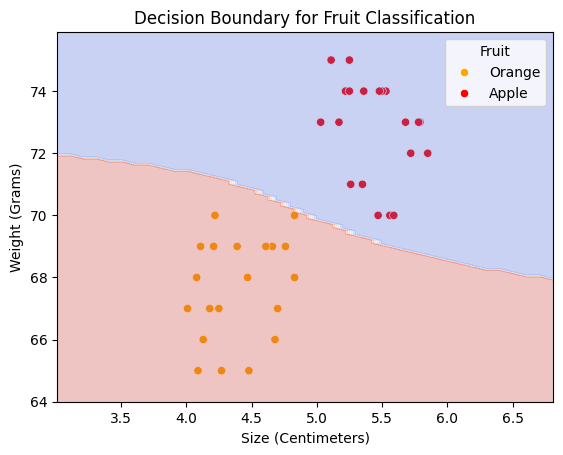

In [ ]:
sns.scatterplot(x = 'Size', y = 'Weight', hue = 'Class', data = data, palette = {'Apple': 'red', 'Orange': 'orange'})
plt.contourf(sizes, weights, predictions, alpha = 0.3, cmap = 'coolwarm')
plt.title('Decision Boundary for Fruit Classification')
plt.xlabel('Size (Centimeters)')
plt.ylabel('Weight (Grams)')
plt.legend(title = 'Fruit')
plt.show()

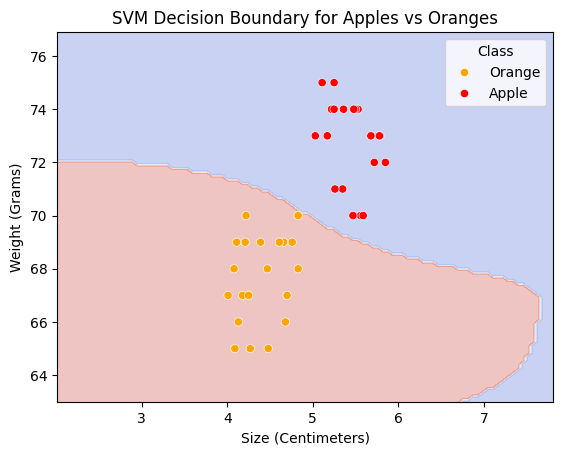

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}
Enhanced Model Accuracy: 100.00%


In [ ]:


import matplotlib.pyplot as plt


size_min, size_max = sizes.min() - 1, sizes.max() + 1
weight_min, weight_max = weights.min() - 1, weights.max() + 1
xx, yy = np.meshgrid(np.linspace(size_min, size_max, 100),
                     np.linspace(weight_min, weight_max, 100))


Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
sns.scatterplot(x=data["Size"], y=data["Weight"], hue=data["Class"], palette={'Apple': 'red', 'Orange': 'orange'})
plt.xlabel('Size (Centimeters)')
plt.ylabel('Weight (Grams)')
plt.title('SVM Decision Boundary for Apples vs Oranges')
plt.show()




from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(features, labels_encoded)


print(f"Best Parameters: {grid_search.best_params_}")


best_model = SVC(**grid_search.best_params_)
best_model.fit(features, labels_encoded)




from sklearn.preprocessing import StandardScaler

data['Size_to_Weight'] = data['Size'] / data['Weight']


scaler = StandardScaler()
features_scaled = scaler.fit_transform(data[['Size', 'Weight', 'Size_to_Weight']])


model_enhanced = SVC(kernel='rbf', gamma='scale', C=1)
model_enhanced.fit(features_scaled, labels_encoded)


print(f"Enhanced Model Accuracy: {model_enhanced.score(features_scaled, labels_encoded) * 100:.2f}%")


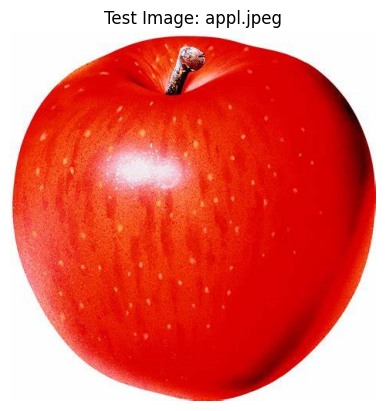

Predicted Class: Apple



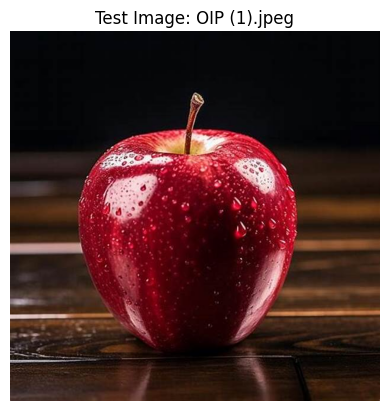

Predicted Class: Apple



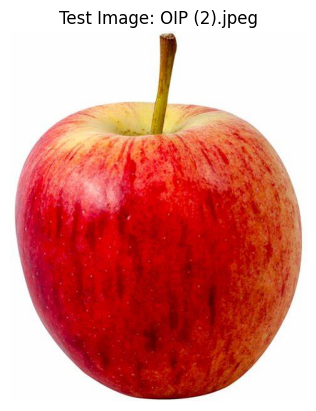

Predicted Class: Apple



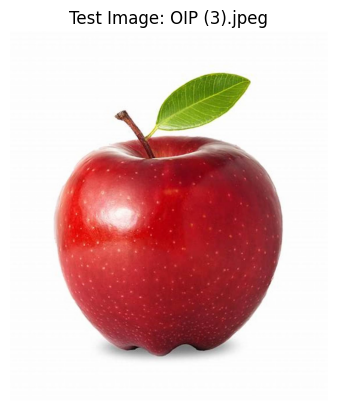

Predicted Class: Apple



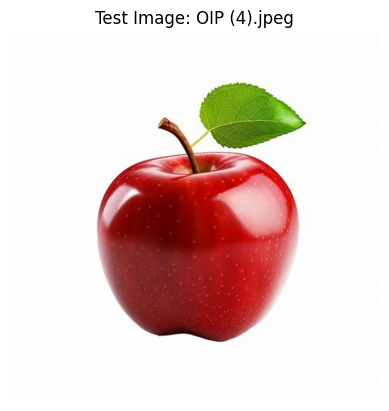

Predicted Class: Apple



In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt


test_dir = "test_images"


def extract_features(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)[1]
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        size = cv2.contourArea(contours[0])
        size = 0

    weight = np.sum(img) / 255

    return np.array([size, weight]).reshape(1, -1)


test_images = [f for f in os.listdir(test_dir) if f.endswith(('.jpg', '.png', '.jpeg'))][:5]


for img_name in test_images:
    img_path = os.path.join(test_dir, img_name)


    img = cv2.imread(img_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(f"Test Image: {img_name}")
    plt.show()


    features = extract_features(img_path)
    prediction = model.predict(features)
    predicted_label = label_encoder.inverse_transform(prediction)[0]

    print(f"Predicted Class: {predicted_label}\n")
